In [13]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
methods = ['No_Deconv', 'FPFS',
           'Richard-Lucy(10)', 'Richard-Lucy(20)', 
           'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
           'Unrolled_ADMM(1)', 'Unrolled_ADMM(2)', 'Unrolled_ADMM(4)', 'Unrolled_ADMM(8)']
snrs = [100, 20, 10]
y_lims = {'100':[0, 0.23], '20':[0, 0.25], '10':[0, 0.5]}
text_bias = {'100':[(0.0035, -1.1e-3), (-0.0085, -5e-4), 
                    (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
                    (-0.0013, -6e-3), (-0.008, -2.5e-3), (-0.008, -0.6e-3), (-0.008, -2e-3)],
             '20':[(0.003, 0), (0.003, -1.1e-3), 
                   (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
                   (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)],
             '10':[(-0.015, -1.1e-3), (0.005, -5e-4), 
                   (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
                   (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]}
texts = ['(10)', '(20)', '(30)', '(50)', '(100)', '(1)', '(2)', '(4)', '(8)']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


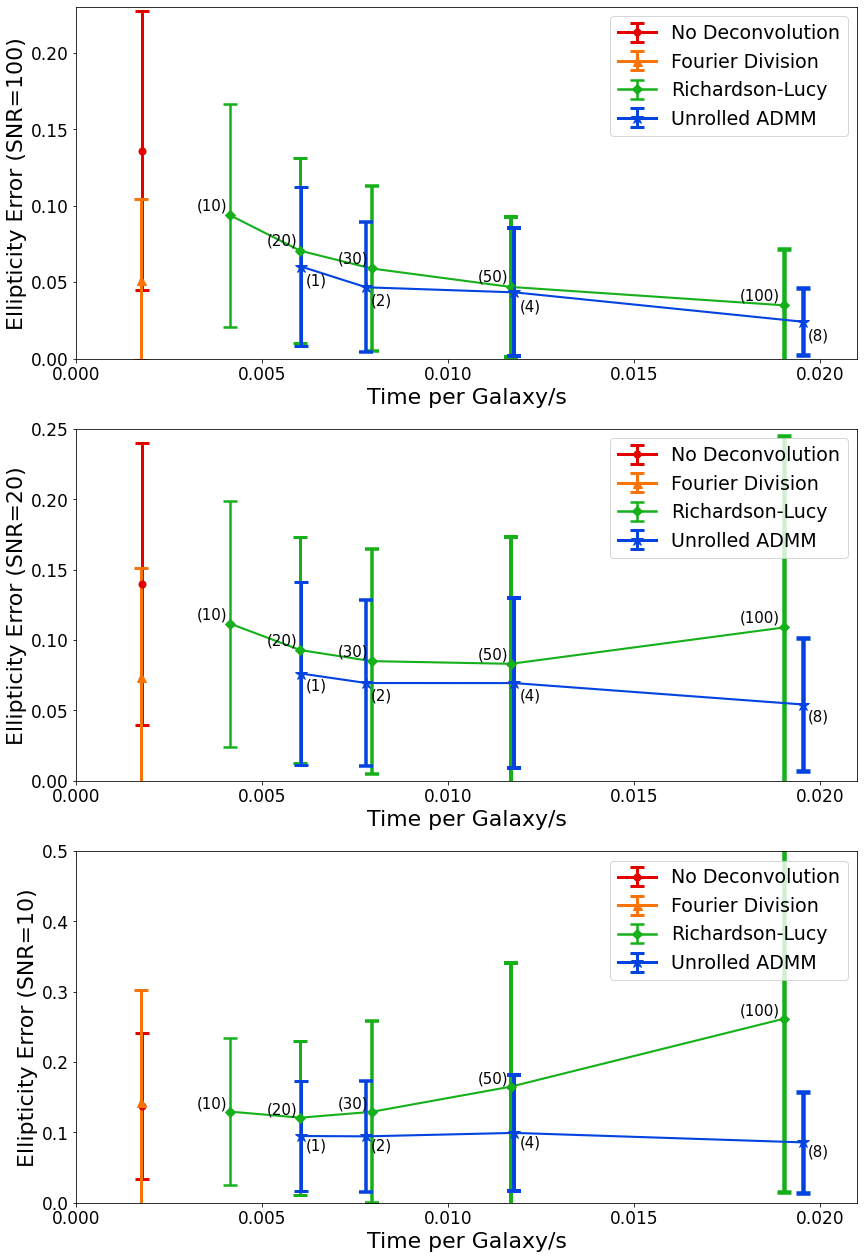

In [15]:
fig = plt.figure(figsize=(14,22), facecolor='white')
for idx, snr in enumerate(snrs):
    ax1 = plt.subplot(3,1,idx+1)
    shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
    for method in methods:
        results_file = os.path.join('results', method, f'results.json')
        with open(results_file, 'r') as f:
            results = json.load(f)
        if method == 'No_Deconv':
            gt_shear = np.array(results[str(snr)]['gt_shear'])
        total_time, n_gal = results['time']
        rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
        ts.append(total_time/n_gal)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))

    ax1.errorbar(ts[0:1], g_errs[0:1], yerr=g_stds[0:1], linewidth=3, capsize=7, capthick=3, marker='o', markersize = 7, color='xkcd:red', label='No Deconvolution')
    ax1.errorbar(ts[1:2], g_errs[1:2], yerr=g_stds[1:2], linewidth=3, capsize=7, capthick=3, marker='^', markersize = 9, color='xkcd:orange', label='Fourier Division')
    # ax1.errorbar(ts[2:7], g_errs[2:7], yerr=g_stds[2:7], linewidth=2.5, capsize=7, capthick=2, marker='D', markersize = 6.5, color='xkcd:green', label='Richardson-Lucy')
    # ax1.errorbar(ts[7:11], g_errs[7:11], yerr=g_stds[7:11], linewidth=2.5, capsize=7, capthick=2, marker='*', markersize = 11.7, color='xkcd:blue', label='Unrolled ADMM')
    ax1.plot(ts[2:7], g_errs[2:7], linewidth=2.1, color='xkcd:green')
    for k, (t, g_err, g_std) in enumerate(zip(ts[2:7], g_errs[2:7], g_stds[2:7])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*k, capsize=7, capthick=2.5+0.5*k, marker='D', markersize = 6.5, color='xkcd:green', label='Richardson-Lucy')
        else:
            ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*k, capsize=7, capthick=2.5+0.5*k, marker='D', markersize = 6.5, color='xkcd:green')
            
    ax1.plot(ts[7:11], g_errs[7:11], linewidth=2.1, color='xkcd:blue')
    for k, (t, g_err, g_std) in enumerate(zip(ts[7:11], g_errs[7:11], g_stds[7:11])):
        if k == 0 :
            ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*(k+1), capsize=7, capthick=2.5+0.5*(k+1), marker='*', markersize = 13, color='xkcd:blue', label='Unrolled ADMM')
        else:
            ax1.errorbar(t, g_err, yerr=g_std, linewidth=2.5+0.5*(k+1), capsize=7, capthick=2.5+0.5*(k+1), marker='*', markersize = 13, color='xkcd:blue')
            
    bias = np.array(text_bias[str(snr)][2:])
    for k, (t, g_err, text, bias_y, bias_x) in enumerate(zip(ts[2:], g_errs[2:], texts, bias[:,0], bias[:,1])):
        bias_x = -9e-4 if k<=3 else (1.3e-4 if k>=5 else -1.2e-3)
        bias_y = (0.005 if k<=4 else -0.02) if idx==2 else (0.0035 if k<=4 else -0.012)
        ax1.text(t+bias_x, g_err+bias_y, text, fontsize=15)
        
    ax1.set_xlim([0, 0.021])
    ax1.set_xticks([0, 0.005, 0.01, 0.015, 0.02])
    ax1.set_xticklabels(['0.000', '0.005', '0.010', '0.015', '0.020'])
    ax1.set_ylim(y_lims[str(snr)])
    ax1.set_ylabel(f'Ellipticity Error (SNR={snr})', fontsize=22)
    ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
    plt.tick_params(labelsize=17)
    plt.legend(fontsize=19)
    # plt.title(f'SNR={snr}', fontsize=23)

plt.savefig(os.path.join('figures', f'time_err.eps'), bbox_inches='tight')
plt.savefig(os.path.join('figures', f'time_err.jpg'), bbox_inches='tight')

In [16]:
# snr = 100

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))

# text_bias = [(0.0035, -1.1e-3), (-0.0085, -5e-4), 
#              (0.004, -1.5e-3), (0.004, -1.5e-3), (0.003, 0), (0.003, -1.8e-3), (0.004, -1.8e-3), 
#              (-0.0013, -4.3e-3), (-0.008, -1.6e-3), (-0.008, 0), (-0.008, -1.5e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0., 0.23])
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

# plt.tick_params(labelsize=17)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

In [17]:
# snr = 20

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))

# text_bias = [(0.003, 0), (0.003, -1.1e-3), 
#              (0.004, -1.5e-3), (0.004, -1.5e-3), (-0.008, -1.5e-3), (0.003, 0), (0.004, -1.8e-3), 
#              (-0.008, -3.8e-3), (-0.008, -1.3e-3), (0.003, 0), (-0.008, -1.6e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0, 0.25])
# # plt.yscale('log')
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)

# plt.tick_params(labelsize=17)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')

In [18]:
# snr = 10

# fig, ax1 = plt.subplots(figsize=(14,10), facecolor='white')

# shear_err_1, shear_err_2, g_errs, g_stds, ts = [], [], [], [], []
# for method in methods:
#     results_file = os.path.join('results', method, f'results.json')
#     with open(results_file, 'r') as f:
#         results = json.load(f)
#     if method == 'No_Deconv':
#         gt_shear = np.array(results[str(snr)]['gt_shear'])
#     total_time, n_gal = results['time']
#     rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
#     ts.append(total_time/n_gal)
#     g_errs.append(np.mean(rec_err[:,2]))
#     g_stds.append(np.std(rec_err[:,2]))


# text_bias = [(-0.015, -1.1e-3), (0.005, -5e-4), 
#              (0.005, -1.3e-3), (-0.014, 0), (0, 1e-4), (0.004, 0), (0.005, -1.8e-3), 
#              (-0.012, -4.2e-3), (-0.012, -1.5e-3), (0.004, 0), (-0.013, -1.6e-3)]
# for t, g_err, g_std, method, (tb_y, tb_x) in zip(ts, g_errs, g_stds, methods, text_bias):
#     color = 'xkcd:blue' if 'ADMM' in method else ('xkcd:green' if 'Richard-Lucy' in method else ('xkcd:orange' if method=='FPFS' else 'xkcd:red'))
#     bias = -0.01 if 'ADMM' in method else 0.004
#     ax1.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     ax1.text(t+tb_x, g_err+tb_y, method, fontsize=15)
    
# ax1.set_xlim([-0.0005, 0.023])
# ax1.set_ylim([0, 0.45])
# # plt.yscale('log')
# ax1.set_ylabel('Ellipticity Error', fontsize=22)
# ax1.set_xlabel('Time per Galaxy/s', fontsize=22)
# plt.title(f'Ellipticity Errors - Time Plot for SNR={snr}', fontsize=23)
# plt.savefig(os.path.join('figures', f'time_err_{snr}.jpg'), bbox_inches='tight')